In [1]:
import numpy as np
import random

In [2]:
def greedy_approximation(graph, k):
    """
    Greedy approximation algorithm for Influence Maximization.
    
    Args:
    - graph: a dict where keys are nodes and values are lists of neighbors. 
    - k: the number of seed nodes to select.

    Returns:
    - A set of k nodes that maximizes the influence spread.
    """
    # Initialize an empty set of selected nodes
    selected_nodes = set()
    # The greedy process: iteratively select the node that maximizes the spread
    for _ in range(k):
        best_node = None
        best_spread = 0
        for node in graph:
            if node not in selected_nodes:
                # Estimate the spread of influence by adding this node
                influence_spread = simulate_influence(graph, selected_nodes | {node})
                if influence_spread > best_spread:
                    best_spread = influence_spread
                    best_node = node
        selected_nodes.add(best_node)
    
    return selected_nodes

In [3]:
def simulate_influence(graph, seed_set):
    """
    Simulate the influence spread given a set of seed nodes.
    
    Args:
    - graph: a dict where keys are nodes and values are lists of neighbors.
    - seed_set: a set of nodes from which influence starts.
    
    Returns:
    - The number of influenced nodes.
    """
    influenced_nodes = set(seed_set)
    active_nodes = set(seed_set)
    
    # Simulate the spreading process using a simple diffusion model (e.g., Independent Cascade Model)
    while active_nodes:
        new_active_nodes = set()
        for node in active_nodes:
            for neighbor in graph[node]:
                if neighbor not in influenced_nodes:
                    # Randomly decide whether the neighbor gets influenced
                    if random.random() < 0.1:  # Assume a fixed probability of influence
                        new_active_nodes.add(neighbor)
                        influenced_nodes.add(neighbor)
        active_nodes = new_active_nodes
    
    return len(influenced_nodes)

1. **Greedy Algorithm**: The algorithm iteratively selects the node that, when added to the current seed set, maximizes the influence spread. The influence spread is estimated by simulating the diffusion process.

2. **Simulating Influence**: The influence spread is simulated using a simple diffusion model (Independent Cascade Model), where nodes influence their neighbors with a fixed probability (0.1 in this demo).

3. **Graph Representation**: The graph is represented as an adjacency list where each node is a key, and its neighbors are listed in the corresponding value.

summary: The algorithm selects `k` nodes that maximize the influence spread. Influence spread is simulated by randomly spreading influence among neighbors.

In [4]:
# Example usage
graph = {
    1: [2, 3],
    2: [1, 4],
    3: [1, 5],
    4: [2],
    5: [3]
}

k = 2  # Number of seed nodes to select
seed_nodes = greedy_approximation(graph, k)
print("Selected seed nodes:", seed_nodes)

# the graph can be ploted as follow:
# 4 -- 2 -- 1 -- 3 -- 5

Selected seed nodes: {1, 2}


In [5]:
import networkx as nx

# Function to generate a random graph
def generate_random_graph(num_nodes, edge_prob=0.2):
    """
    Generates a random graph using the Erdos-Renyi model.
    
    Args:
    - num_nodes: Number of nodes in the graph.
    - edge_prob: Probability of edge creation between any two nodes.

    Returns:
    - A graph represented as an adjacency list.
    """
    G = nx.erdos_renyi_graph(num_nodes, edge_prob)
    graph = {node: list(G.neighbors(node)) for node in G.nodes()}
    return graph

In [6]:
# Generate a random graph and run the greedy algorithm
num_nodes = 40
edge_prob = 0.3
graph = generate_random_graph(num_nodes, edge_prob)
k = 3  # Select 3 seed nodes

# Run the greedy approximation algorithm
selected_nodes = greedy_approximation(graph, k)
print("Selected seed nodes:", selected_nodes)

Selected seed nodes: {2, 6, 15}


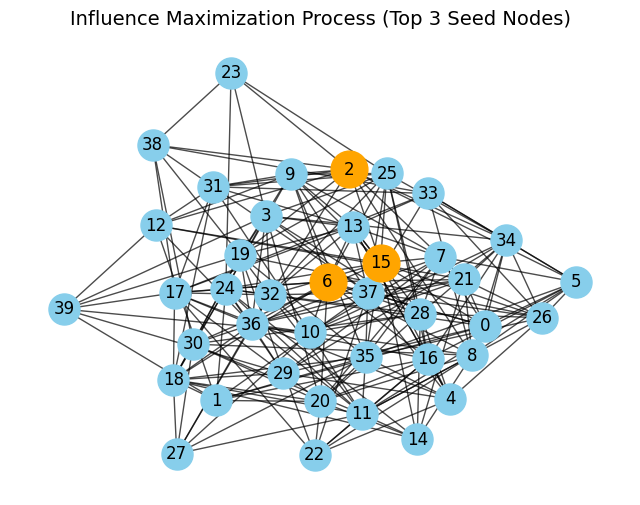

In [7]:
import matplotlib.pyplot as plt

# Function to visualize the influence maximization process
def visualize_influence(graph, selected_nodes, k):
    G = nx.Graph(graph) # Generate the graph
    plt.figure(figsize=(8, 6))
    # Draw the graph with nodes colored based on whether they are selected as seed nodes
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
    # Highlight the selected seed nodes
    nx.draw_networkx_nodes(G, pos, nodelist=selected_nodes, node_size=700, node_color='orange')
    nx.draw_networkx_edges(G, pos, alpha=0.7) # Draw edges
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black') # Draw labels for nodes

    plt.title(f"Influence Maximization Process (Top {k} Seed Nodes)", fontsize=14)
    plt.axis('off')
    plt.show()
    
# Visualize the process for the generated graph and selected seed nodes
visualize_influence(graph, selected_nodes, k)